# Automated Chest X-ray based Pneumonia Diagnosis using PneumoniaNet
The author of this notebook is **Dr Raheel Siddiqi**. He is a *Senior Assistant Professor* at Bahria University, Karachi Campus, Pakistan. His research interests include *Medical Imaging*, *Computer Vision* and *Deep Learning*. 

The objective of the experiment (presented in this notebook) is to evaluate the performance of a self-designed Convolutional Neural Network (CNN) based model called **PneumoniaNet**. PneumoniaNet is employed to diagnose Pneumonia (based on Chest X-ray images). The diagnosis process comprises of classifying Chest X-ray images into one of the two classes: (a) Normal, (b) Pneumonia.

The dataset is downloded from [kaggle.com](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). The dataset contains 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). The dataset is divided into three sets: (a) train, (b) val and (c) test.

PneumoniaNet is based on a very simple 21-layer CNN architecture, where only 13 layers have trainable weights and biases. In order to avoid overfitting the following steps are ensured:
1. Using a low capacity network i.e. less number of layers, less learnable parameters. This is done to reduce memorization capacity.
2. Adding weight regularization to dense layer.
3. Drop out layers have also been added.

# Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


# Setting up the Model

In [2]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

pneumoniaNetModel=models.Sequential()

pneumoniaNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)))
pneumoniaNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pneumoniaNetModel.add(layers.Dropout(0.2))

pneumoniaNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pneumoniaNetModel.add(layers.Dropout(0.2))

pneumoniaNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
pneumoniaNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pneumoniaNetModel.add(layers.Dropout(0.2))

pneumoniaNetModel.add(layers.Flatten())
pneumoniaNetModel.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
pneumoniaNetModel.add(layers.Dropout(0.2))
pneumoniaNetModel.add(layers.Dense(2, activation='softmax'))

pneumoniaNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
pneumoniaNetModel.summary()

filepath="PneumoniaNet7.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 144, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 142, 142, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 71, 71, 128)       0         
___________________________

## Setting up Training and Validation Data for the experiment

In [3]:
image_height = 150
image_width = 150
batch_size = 8
no_of_epochs  = 200
number_of_training_samples=5216
number_of_validation_samples=16
number_of_test_samples=624

In [4]:
train_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\train'
validation_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\val'
test_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = train_datagen.flow_from_directory(train_dir,target_size=(image_width, image_height),batch_size=batch_size)
validation_set = validation_datagen.flow_from_directory(validation_dir,target_size=(image_width, image_height),batch_size=batch_size,shuffle=False)
test_set = test_datagen.flow_from_directory(test_dir,target_size=(image_width, image_height),batch_size=batch_size,shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model Training

In [7]:
import math

history = pneumoniaNetModel.fit_generator(
      training_set,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=no_of_epochs,
      callbacks=callbacks_list,
      validation_data=validation_set,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
652/652 [==============================] - 219s 336ms/step - loss: 0.7069 - categorical_accuracy: 0.7425 - val_loss: 0.7902 - val_categorical_accuracy: 0.5000
Epoch 2/200
652/652 [==============================] - 210s 321ms/step - loss: 0.5847 - categorical_accuracy: 0.7429 - val_loss: 0.7135 - val_categorical_accuracy: 0.5000
Epoch 3/200
652/652 [==============================] - 210s 321ms/step - loss: 0.4471 - categorical_accuracy: 0.7949 - val_loss: 0.5666 - val_categorical_accuracy: 0.6250
Epoch 4/200
652/652 [==============================] - 210s 321ms/step - loss: 0.3546 - categorical_accuracy: 0.8411 - val_loss: 0.4639 - val_categorical_accuracy: 0.8125
Epoch 5/200
652/652 [==============================] - 210s 321ms/step - loss: 0.3283 - categorical_accuracy: 0.8574 - val_loss: 0.4358 - val_categorical_accuracy: 0.8125
Epoch 6/200
652/652 [==============================] - 210s 321ms/step - loss: 0.3216 - categoric

652/652 [==============================] - 211s 323ms/step - loss: 0.1621 - categorical_accuracy: 0.9469 - val_loss: 0.7960 - val_categorical_accuracy: 0.6250
Epoch 48/200
652/652 [==============================] - 210s 322ms/step - loss: 0.1676 - categorical_accuracy: 0.9436 - val_loss: 0.4326 - val_categorical_accuracy: 0.7500
Epoch 49/200
652/652 [==============================] - 210s 322ms/step - loss: 0.1552 - categorical_accuracy: 0.9482 - val_loss: 0.4684 - val_categorical_accuracy: 0.6250
Epoch 50/200
652/652 [==============================] - 210s 322ms/step - loss: 0.1506 - categorical_accuracy: 0.9526 - val_loss: 0.5334 - val_categorical_accuracy: 0.6875
Epoch 51/200
652/652 [==============================] - 210s 322ms/step - loss: 0.1486 - categorical_accuracy: 0.9519 - val_loss: 0.7060 - val_categorical_accuracy: 0.6250
Epoch 52/200
652/652 [==============================] - 210s 322ms/step - loss: 0.1467 - categorical_accuracy: 0.9519 - val_loss: 0.5812 - val_categorica

Epoch 95/200
652/652 [==============================] - 552s 846ms/step - loss: 0.0941 - categorical_accuracy: 0.9703 - val_loss: 0.6621 - val_categorical_accuracy: 0.8125
Epoch 96/200
652/652 [==============================] - 220s 338ms/step - loss: 0.0987 - categorical_accuracy: 0.9720 - val_loss: 0.3377 - val_categorical_accuracy: 0.8125
Epoch 97/200
652/652 [==============================] - 221s 338ms/step - loss: 0.0939 - categorical_accuracy: 0.9724 - val_loss: 0.4397 - val_categorical_accuracy: 0.7500
Epoch 98/200
652/652 [==============================] - 220s 338ms/step - loss: 0.0886 - categorical_accuracy: 0.9735 - val_loss: 0.7540 - val_categorical_accuracy: 0.6250
Epoch 99/200
652/652 [==============================] - 220s 338ms/step - loss: 0.0974 - categorical_accuracy: 0.9691 - val_loss: 0.4533 - val_categorical_accuracy: 0.8125
Epoch 100/200
652/652 [==============================] - 221s 338ms/step - loss: 0.0894 - categorical_accuracy: 0.9734 - val_loss: 0.2696 - 

652/652 [==============================] - 220s 337ms/step - loss: 0.0673 - categorical_accuracy: 0.9808 - val_loss: 0.3463 - val_categorical_accuracy: 0.8750
Epoch 143/200
652/652 [==============================] - 220s 337ms/step - loss: 0.0768 - categorical_accuracy: 0.9770 - val_loss: 0.6441 - val_categorical_accuracy: 0.7500
Epoch 144/200
652/652 [==============================] - 220s 337ms/step - loss: 0.0642 - categorical_accuracy: 0.9827 - val_loss: 0.1764 - val_categorical_accuracy: 1.0000
Epoch 145/200
652/652 [==============================] - 220s 337ms/step - loss: 0.0712 - categorical_accuracy: 0.9789 - val_loss: 0.4702 - val_categorical_accuracy: 0.8125
Epoch 146/200
652/652 [==============================] - 220s 337ms/step - loss: 0.0673 - categorical_accuracy: 0.9816 - val_loss: 0.5731 - val_categorical_accuracy: 0.8125
Epoch 147/200
652/652 [==============================] - 220s 337ms/step - loss: 0.0699 - categorical_accuracy: 0.9826 - val_loss: 0.1837 - val_categ

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



652/652 [==============================] - 221s 339ms/step - loss: 0.0535 - categorical_accuracy: 0.9860 - val_loss: 0.4674 - val_categorical_accuracy: 0.8750
Epoch 197/200
652/652 [==============================] - 221s 339ms/step - loss: 0.0550 - categorical_accuracy: 0.9833 - val_loss: 0.9528 - val_categorical_accuracy: 0.6875
Epoch 198/200
652/652 [==============================] - 221s 339ms/step - loss: 0.0488 - categorical_accuracy: 0.9870 - val_loss: 0.5087 - val_categorical_accuracy: 0.8125
Epoch 199/200
652/652 [==============================] - 220s 338ms/step - loss: 0.0446 - categorical_accuracy: 0.9883 - val_loss: 0.3758 - val_categorical_accuracy: 0.8750
Epoch 200/200
392/652 [=================>............] - ETA: 1:27 - loss: 0.0514 - categorical_accuracy: 0.9872

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Visualizing the Training Process

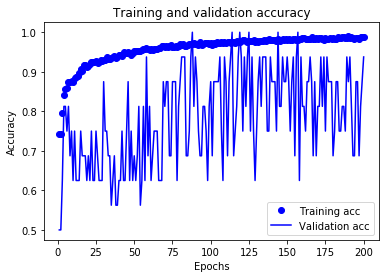

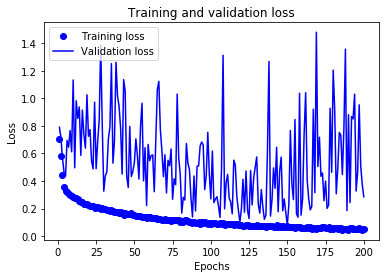

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Loading the Best Model

In [9]:
from tensorflow.python.keras.models import load_model

best_model = load_model('PneumoniaNet7.h5')

## Evaluating the Best Model

In [10]:
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_set, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

78/78 [==============================] - 12s 150ms/step - loss: 0.2052 - categorical_accuracy: 0.9503
Test-set classification accuracy: 95.03%


## Calculating Precision, Specificity and Sensitivity (Recall) values for the model
*Precision-Recall* is a useful measure of success of prediction when the classes are very imbalanced. High *precision* relates to a low false positive rate, and high *recall* relates to a low false negative rate.

Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Recall is defined as the number of true positives over the number of true positives plus the number of false negatives. Please see the [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) for details.

Another way of assessing a binary classification model is to compute the *sensitivity* (also called the true positive rate or the recall) and *specificity* (also called the true negative rate) of the model. *Sensitivity* indicates the percentage of sick people who are correctly identified as having the condition. *Specificity* indicates the percentage of healthy people who are correctly identified as not having the condition.

But first we prepare our test data, so that later we can draw the *confusion matrix* as well as calculate *precision*, *specificity* and *sensitivity (recall)* of the model.

In [11]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

normal_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\NORMAL')
pneumonia_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [12]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 8s 12ms/sample - loss: 0.2072 - categorical_accuracy: 0.9487
Loss on test set:  0.20720209608761928
Accuracy on test set:  0.94871795


In [13]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(624,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

624/624 [==============================] - 6s 10ms/sample
(624, 1)
(624, 1)


<Figure size 432x288 with 0 Axes>

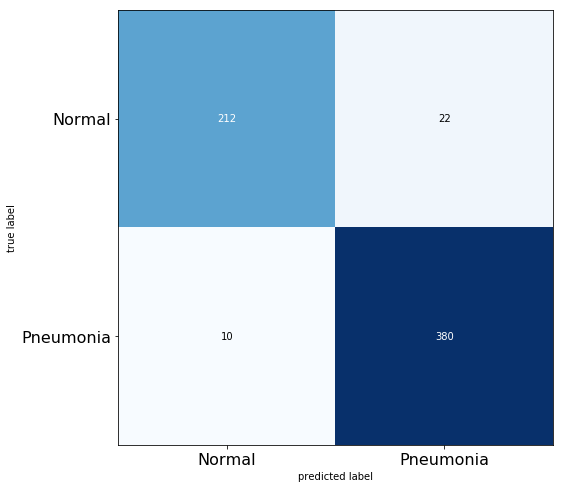

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [15]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall) of the model is {:.3f}".format(recall))
print("Specificity of the model is {:.3f}".format(specificity))
print("Precision of the model is {:.3f}".format(precision))

Sensitivity (Recall) of the model is 0.974
Specificity of the model is 0.906
Precision of the model is 0.945


So, this model has a **`97.4%`** sensitivity (recall), **`90.6%`** specificity and **`94.5%`** precision.

## ROC Curve and AUC for the model
**Receiver operating characteristic** curve (a.k.a ROC) is a graphic plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". **Area Under the Curve** (a.k.a. AUC) is the percentage of the area that is under this ROC curve, ranging between 0 and 1.
ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance. The higher the AUC is, the better the classifier.

In [16]:
from sklearn.metrics import roc_curve

probs = best_model.predict_proba(test_data)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), preds)

In [17]:
from sklearn.metrics import auc
auc_var = auc(fpr, tpr)

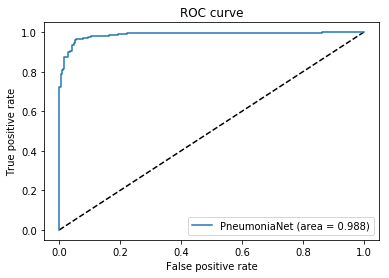

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='PneumoniaNet (area = {:.3f})'.format(auc_var))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Precision-Recall Curve for the Model

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [20]:
precision, recall, thresholds = precision_recall_curve(test_labels.ravel(), preds)

In [21]:
auc_var2 = auc(recall, precision)

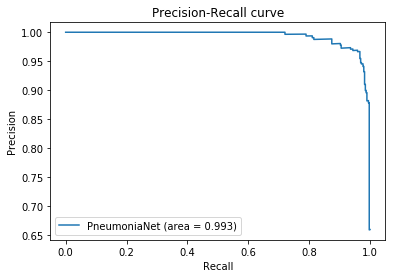

In [22]:
plt.figure()
plt.plot(recall, precision, label='PneumoniaNet (area = {:.3f})'.format(auc_var2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

In [23]:
print('Average Precision Score: {:.3f}'.format(average_precision_score(test_labels.ravel(), preds)))

Average Precision Score: 0.993


In [24]:
print("F1 Score: {:.3f}".format(f1_score(test_labels.ravel(),predicted_labels.ravel())))

F1 Score: 0.960
